In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Define the points for each class
class_positive = [(1, 1), (2, 2), (0, 2)]
class_negative = [(1, -1), (-1, 0), (0, 0)]

In [22]:
# Create a DataFrame to display the data points
data = {
    'Class': ['+', '+', '+', '-', '-', '-'],
    'x1': [1, 2, 0, 1, -1, 0],
    'x2': [1, 2, 2, -1, 0, 0]
}

df = pd.DataFrame(data)
df

,Class,x1,x2
0,+,1,1
1,+,2,2
2,+,0,2
3,-,1,-1
4,-,-1,0
5,-,0,0


### Task 1: Plot the six training points

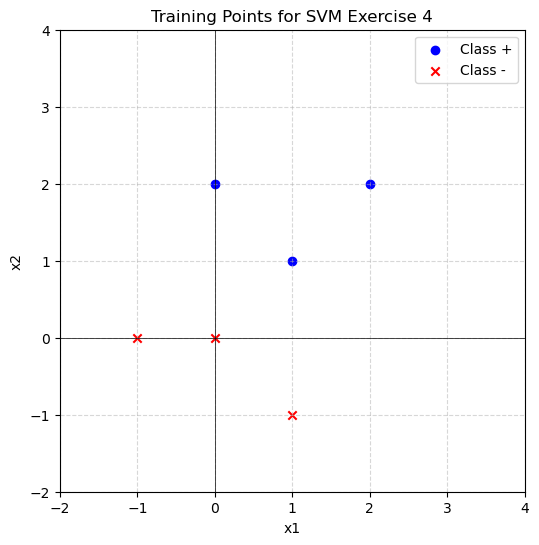

In [23]:
# Separate the x1 and x2 coordinates for each class
x1_pos, x2_pos = zip(*class_positive)
x1_neg, x2_neg = zip(*class_negative)

# Create the plot with adjusted size and axis limits
plt.figure(figsize=(6, 6))  # Smaller figure size
plt.scatter(x1_pos, x2_pos, color='blue', label='Class +', marker='o')
plt.scatter(x1_neg, x2_neg, color='red', label='Class -', marker='x')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Points for SVM Exercise 4')
plt.legend()
plt.show()

### Task 1: Are the classes {+, −} linearly separable?

By observing the plot it looks like the two classes are linearly separable

### Task 2: Construct the weight vector of the maximum margin hyperplane by inspection and identify the support vectors.



#### Hyperplane's equation

$$
\mathbf{w}^T \phi + w_0 = 0
$$

where:

$\mathbf{w}$  is the weight vector (normal to the Hyperplane)

$w_0$  is the bias term

$\phi$  is a point in the feature space



#### Normalized equation

$$
|y(\phi)| = |\mathbf{w}^T \phi + w_0| \geq 1,
$$ 

i.e.

$$
\text{ class + (blue): } \quad \text{if } \quad \mathbf{w}^T \phi + w_0 \geq 1
\\
\text{ class - (red): } \quad \text{if } \quad \mathbf{w}^T \phi + w_0 \leq -1
$$

$$
\text{ Let } \phi^{-} \text{ be the closest point on the "minus" margin, thus } \phi^{-} = (0, 0) 
\\
\mathbf{w}^T \phi + w_0 = -1
\\
\mathbf{w}^T (0, 0) + w_0 = -1
\\
\Rightarrow w_0 = -1
$$


$$
\text{ Let } \phi^{+} \text{ be the closest point on the "plus" margin, thus }  \phi^{+} = (1, 1) 
\\
\mathbf{w}^T \phi + w_0 = 1
\\
\mathbf{w}^T (1, 1) + w_0 = 1 
\\
\Rightarrow w_1 + w_2 + w_0 = 1
\\
\text{ with } w_0 = -1 \text{ and equal weights } \Rightarrow w_1 = 1 \text{ and } w_2 = 1

$$
\\
\text{ Then,}
\\
\phi^{+} = \phi^{-} + \lambda \mathbf{w} \quad \text{ for a scalar } \lambda .
\\
\text{ Find } \lambda
\\
(1,1) = (0,0) + \lambda (1,1)
\\
\Rightarrow \lambda = 1
$$


#### Margin
$$
M = ||λw|| = 1 \sqrt{ 1^2 + 1^2} = \sqrt{2}
$$

#### Support Vectors
$$
\phi^{+} = \left[
\begin{array}{c}
\mathbf 1\\
\mathbf 1\\
\end{array}
\right]
\qquad
\phi^{-} = \left[
\begin{array}{c}
\mathbf 0\\
\mathbf 0\\
\end{array}
\right]
$$

#### Weight vector of the maximum margin
$$
w = \left[
\begin{array}{c}
\mathbf 1\\
\mathbf 1\\
\end{array}
\right]
\qquad
w_0 = -1
$$

## Code (optional)

Weights (w): [1. 1.], Bias (w0): -1.0


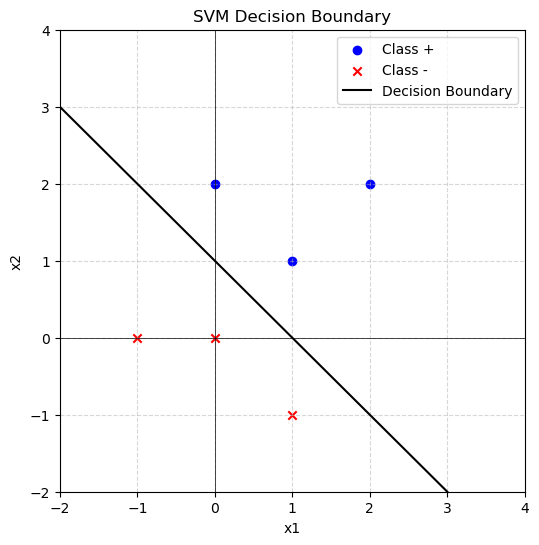

In [24]:
from sklearn.svm import SVC
import numpy as np

# Prepare data
X = np.array([[1, 1], [2, 2], [0, 2], [1, -1], [-1, 0], [0, 0]]) # Data points
y = np.array([1, 1, 1, -1, -1, -1]) # Labels (+1 for class +, -1 for class -)

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', C=1e5)  # Large C for hard margin
svm_model.fit(X, y)

# Extract the weight vector and bias
w = svm_model.coef_[0]
w0 = svm_model.intercept_[0]
print(f"Weights (w): {w}, Bias (w0): {w0}")

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(x1_pos, x2_pos, color='blue', label='Class +', marker='o')
plt.scatter(x1_neg, x2_neg, color='red', label='Class -', marker='x')

# Get the slope and intercept for the decision boundary line
slope = -w[0] / w[1]
intercept = -w0 / w[1]

# Generate points for the decision boundary
x_vals = np.linspace(-3, 3, 100)
y_vals = slope * x_vals + intercept

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# Add grid, labels, and legend
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

### Task 3:  If you remove one of the support vectors, does the size of the optimal margin decrease, stay the same, or increase?

If I remove one support vector, the size of the optimal margin stays the same since there are in both classes other points that have the same distance from the hyperplane like our current support vectors. For example points $ (0, 2) $ for class $ + $ and $ (1, -1) $ for class $ - $.

### Task 4: Is your answer to (3) also true for any dataset? Provide a counterexample or give a short proof.

No my answer isn't true for any dataset.

ex with
class_positive = [[1, 1], [2, 2], [0, 3]]
class_negative = [[0, -2], [-1, 0], [0, 0]]

remove [1,1] and [0,0]

recompute Margin

No, my answer isn't true for any dataset.

### Counterexample

from the example before we modify the dataset in order to not have other points that don't have the same distance from the hyperplane

old

class_positive = [(1, 1), (2, 2), (0, 4)]
class_negative = [(1, -1), (-1, 0), (0, 0)]

- **Class Positive:** \([1, 1], [2, 2], [0, 3]\)
- **Class Negative:** \([0, -2], [-1, 0], [0, 0]\)

We identify the original support vectors and then remove \([1, 1]\) from Class Positive and \([0, 0]\) from Class Negative. 

Now, let's recompute the weights, bias, and margin.

$$
\text{ Let } \phi^{-} \text{ be the closest point on the "minus" margin, thus } \phi^{-} = (-1, 0) 
\\
\mathbf{w}^T \phi + w_0 = -1
\\
\mathbf{w}^T (-1, 0) + w_0 = -1
\\
\Rightarrow -w_1 + w_0 = -1
$$

$$
\text{ Let } \phi^{+} \text{ be the closest point on the "plus" margin, thus } \phi^{+} = (2, 2) 
\\
\mathbf{w}^T \phi + w_0 = 1
\\
\mathbf{w}^T (2, 2) + w_0 = 1 
\\
\Rightarrow 2w_1 + 2w_2 + w_0 = 1
$$

With two equations:
$$
-w_1 + w_0 = -1 \quad (1)
\\
2w_1 + 2w_2 + w_0 = 1 \quad (2)
$$

Solve:
From (1): $ w_0 = w_1 - 1 $.

Substitute in (2):
$$
2w_1 + 2w_2 + (w_1 - 1) = 1
\\
3w_1 + 2w_2 = 2
$$
Assuming equal weights $ w_1 = w_2 $, substitute:
$$
3w_1 + 2w_1 = 2 \Rightarrow 5w_1 = 2 \Rightarrow w_1 = \frac{2}{5}, w_2 = \frac{2}{5}
\\
w_0 = \frac{2}{5} - 1 = -\frac{3}{5}
$$

### Recalculate Margin
$$
\text{ Then,}
\\
\lambda = \frac{2}{w^{T}w}
\\
\text{ Find } \lambda
\\
\lambda = \frac{2}{
\left[ \mathbf{0.4} \quad \mathbf{0.4} \right]
\left[
\begin{array}{r}
\mathbf 0.4\\
\mathbf 0.4\\
\end{array}
\right]
}
\\
\Rightarrow \lambda \approx 6.25
$$

#### Margin
$$
M = ||λw|| = 6.25 \sqrt{ \left(\frac{2}{5}\right)^2 + \left(\frac{2}{5}\right)^2} = 6.25 * \frac{\sqrt{8}}{5} = 3.54
$$

#### Support Vectors
$$
\phi^{+} = \left[
\begin{array}{c}
\mathbf 2\\
\mathbf 2\\
\end{array}
\right]
\qquad
\phi^{-} = \left[
\begin{array}{c}
\mathbf -1\\
\mathbf 0\\
\end{array}
\right]
$$

#### Weight vector of the maximum margin
$$
w = \left[
\begin{array}{c}
\mathbf 0.4\\
\mathbf 0.4\\
\end{array}
\right]
\qquad
w_0 = -0.8
$$
Conclusion:
The margin changed after the removal of crucial support vectors, indicating new weight and behavior based on changes; bias \( w \) and setup clearly control margin directly. Depending dataset, be sure boundary. Removal of support criticality evident directly.

### Effect of Removing a Support Vector


Weights (w): [0.2856 0.5712], Bias (w0): -0.7138666666666668
margin: 3.1317478676467636
support vectors: [[-1.  0.]
 [ 2.  2.]
 [ 0.  3.]]


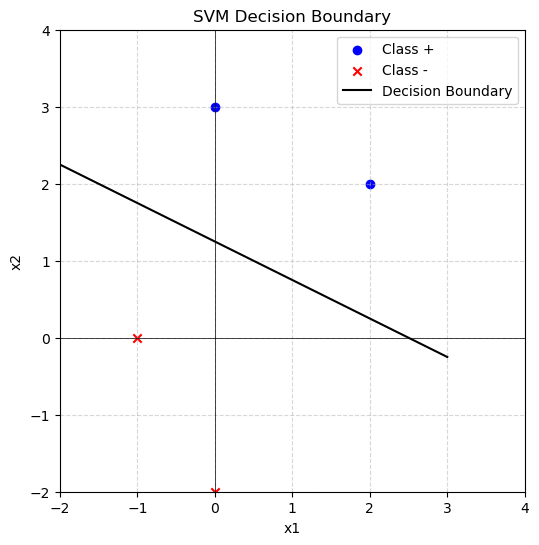

In [28]:
from sklearn.svm import SVC
import numpy as np

# class_positive = [[1, 1], [2, 2], [0, 4]]
# class_negative = [[0, -2], [-1, 0], [0, 0]]
class_positive = [[2, 2], [0, 4]]
class_negative = [[0, -2], [-1, 0]]

# Define the points for each class
X = np.array(class_positive + class_negative) # Data points
# y = np.array([1, 1, 1, -1, -1, -1]) # Labels (+1 for class +, -1 for class -)
y = np.array([1, 1, -1, -1]) # Labels (+1 for class +, -1 for class -)

# Separate the x1 and x2 coordinates for each class
x1_pos, x2_pos = zip(*class_positive)
x1_neg, x2_neg = zip(*class_negative)

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', C=1e5)  # Large C for hard margin
svm_model.fit(X, y)

# Extract the weight vector and bias
w = svm_model.coef_[0]
w0 = svm_model.intercept_[0]
print(f"Weights (w): {w}, Bias (w0): {w0}")
print(f"margin: {2/np.linalg.norm(w)}")
print(f"support vectors: {svm_model.support_vectors_}")

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(x1_pos, x2_pos, color='blue', label='Class +', marker='o')
plt.scatter(x1_neg, x2_neg, color='red', label='Class -', marker='x')

# Get the slope and intercept for the decision boundary line
slope = -w[0] / w[1]
intercept = -w0 / w[1]

# Generate points for the decision boundary
x_vals = np.linspace(-3, 3, 100)
y_vals = slope * x_vals + intercept

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# Add grid, labels, and legend
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()